In [318]:
"JAIHANUMANJI"

'JAIHANUMANJI'

# Credit Scoring Individual Project

#### Submitted To : Professor Philipp Borchert
#### Submitted By : Aazad Ghoslya

## Score Card

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

import re
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, log_loss, accuracy_score
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

## Reading the data

In [320]:
data_accept = pd.read_csv(r"\RealEstateLoans_accepts.csv")
data_reject = pd.read_csv(r"\RealEstateLoans_rejects.csv")

In [321]:
data_accept.head(3)

,total_income,loan_amount,term,interest_rate,own_car,own_house,nr_children,income_type,education_type,family_status,...,occupation_type,family_count,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,Default
0,157500.0,288562.5,30,3.737395,Y,N,0,Commercial associate,Secondary / secondary special,Married,...,Drivers,2.0,NaN,0.541308,0.236611,0,0,0,0,0
1,76500.0,225000.0,48,3.654300,N,Y,3,Working,Secondary / secondary special,Separated,...,Laborers,4.0,NaN,0.395423,0.673830,0,1,0,0,0
2,67500.0,409653.0,12,3.262865,Y,N,0,Working,Secondary / secondary special,Civil marriage,...,Laborers,2.0,NaN,0.649417,0.042929,0,1,0,0,1


In [322]:
data_reject.head(3)

,total_income,loan_amount,term,interest_rate,own_car,own_house,nr_children,income_type,education_type,family_status,...,days_phone_change,occupation_type,family_count,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7
0,270000.0,888840.0,48,2.344399,N,Y,1,Commercial associate,Higher education,Married,...,-1866.0,Core staff,3.0,NaN,0.409056,0.687933,0,1,0,0
1,90000.0,562491.0,36,3.195584,N,Y,0,Working,Secondary / secondary special,Married,...,-1821.0,Laborers,2.0,0.398079,0.693795,0.563835,0,1,0,0
2,225000.0,790830.0,48,3.156887,Y,Y,0,Working,Secondary / secondary special,Single / not married,...,0.0,Laborers,1.0,0.023845,0.420569,0.692559,0,1,0,0


#### - Exploring the Data

In [323]:
data_accept.columns

Index(['total_income', 'loan_amount', 'term', 'interest_rate', 'own_car',
       'own_house', 'nr_children', 'income_type', 'education_type',
       'family_status', 'housing_type', 'region_population_ratio',
       'days_birth', 'days_employed', 'days_registration', 'mobile_number',
       'phone_number', 'email', 'days_phone_change', 'occupation_type',
       'family_count', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'Default'],
      dtype='object')

In [324]:
data_reject.columns

Index(['total_income', 'loan_amount', 'term', 'interest_rate', 'own_car',
       'own_house', 'nr_children', 'income_type', 'education_type',
       'family_status', 'housing_type', 'region_population_ratio',
       'days_birth', 'days_employed', 'days_registration', 'mobile_number',
       'phone_number', 'email', 'days_phone_change', 'occupation_type',
       'family_count', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7'],
      dtype='object')

##### - Check for the Missing values

- #### Accept

In [325]:
data_accept.isna().sum()

total_income                   0
loan_amount                    0
term                           0
interest_rate                  0
own_car                        0
own_house                      0
nr_children                    0
income_type                    0
education_type                 0
family_status                  0
housing_type                   0
region_population_ratio        0
days_birth                     0
days_employed                  0
days_registration              0
mobile_number                  0
phone_number                   0
email                          0
days_phone_change              0
occupation_type             5922
family_count                   0
EXT1                       10415
EXT2                          33
EXT3                        3640
EXT4                           0
EXT5                           0
EXT6                           0
EXT7                           0
Default                        0
dtype: int64

- #### Reject

In [326]:
data_reject.isna().sum()

total_income                  0
loan_amount                   0
term                          0
interest_rate                 0
own_car                       0
own_house                     0
nr_children                   0
income_type                   0
education_type                0
family_status                 0
housing_type                  0
region_population_ratio       0
days_birth                    0
days_employed                 0
days_registration             0
mobile_number                 0
phone_number                  0
email                         0
days_phone_change             0
occupation_type            2751
family_count                  0
EXT1                       5273
EXT2                         16
EXT3                       1812
EXT4                          0
EXT5                          0
EXT6                          0
EXT7                          0
dtype: int64

#### - Filling the NA values for 'EXT2', 'EXT3' and occupation type

- #### Accept

In [327]:
data_accept['EXT1'] = data_accept['EXT1'].fillna(-999)
data_accept['EXT2'] = data_accept['EXT2'].fillna(data_accept['EXT2'].median())
data_accept['EXT3'] = data_accept['EXT3'].fillna(data_accept['EXT3'].median())
data_accept['occupation_type'] = data_accept['occupation_type'].fillna('Other')

- #### Reject

In [328]:
data_reject['EXT1'] = data_reject['EXT1'].fillna(-999)
data_reject['EXT2'] = data_reject['EXT2'].fillna(data_reject['EXT2'].median())
data_reject['EXT3'] = data_reject['EXT3'].fillna(data_reject['EXT3'].median())
data_reject['occupation_type'] = data_reject['occupation_type'].fillna('Other')

#### - Exploring the Anonymous Variables

- #### Accepts

In [329]:
print("Unique values in EXT4 :", data_accept['EXT4'].unique())
print("Unique values in EXT5 :", data_accept['EXT5'].unique())
print("Unique values in EXT6 :", data_accept['EXT6'].unique())
print("Unique values in EXT7 :", data_accept['EXT7'].unique())

Unique values in EXT4 : [0 1]
Unique values in EXT5 : [0 1]
Unique values in EXT6 : [0 1]
Unique values in EXT7 : [0 1]


- #### Rejects

In [330]:
print("Unique values in EXT4 :", data_reject['EXT4'].unique())
print("Unique values in EXT5 :", data_reject['EXT5'].unique())
print("Unique values in EXT6 :", data_reject['EXT6'].unique())
print("Unique values in EXT7 :", data_reject['EXT7'].unique())

Unique values in EXT4 : [0 1]
Unique values in EXT5 : [1 0]
Unique values in EXT6 : [0]
Unique values in EXT7 : [0 1]


#### - Exploring the data

- ##### Accept

In [331]:
data_accept.columns

Index(['total_income', 'loan_amount', 'term', 'interest_rate', 'own_car',
       'own_house', 'nr_children', 'income_type', 'education_type',
       'family_status', 'housing_type', 'region_population_ratio',
       'days_birth', 'days_employed', 'days_registration', 'mobile_number',
       'phone_number', 'email', 'days_phone_change', 'occupation_type',
       'family_count', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'Default'],
      dtype='object')

##### Income Distribution

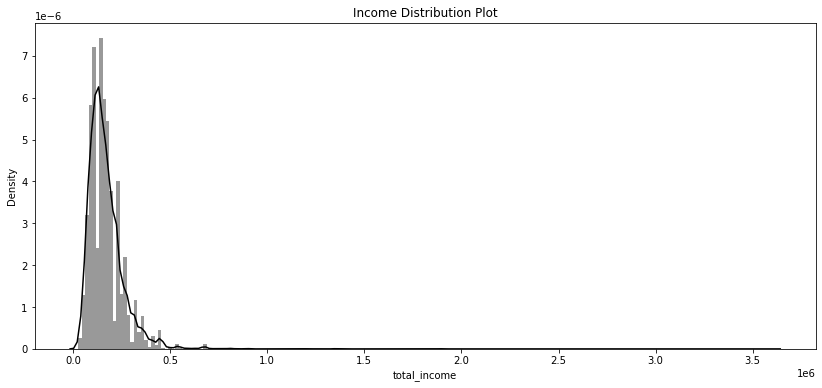

In [332]:
plt.figure(figsize = (14,6))
plt.title('Income Distribution Plot')
sns.set_color_codes("pastel")
sns.distplot(data_accept["total_income"],kde=True,bins=200, color="black")
plt.show()

##### Loan Amount

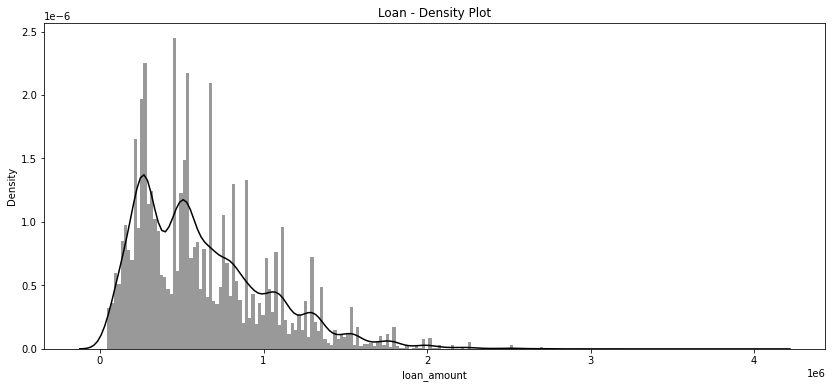

In [333]:
plt.figure(figsize = (14,6))
plt.title('Loan - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data_accept["loan_amount"],kde=True,bins=200, color="black")
plt.show()

#### Car

Text(0.5, 1.0, 'Car Distribution')

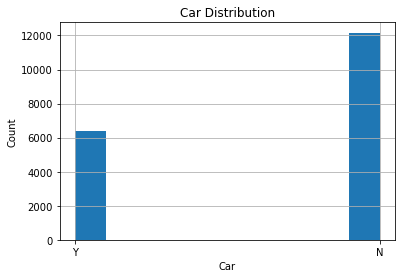

In [334]:
data_accept['own_car'].hist()
plt.xlabel('Car')
plt.ylabel('Count')
plt.title('Car Distribution')

#### House

Text(0.5, 1.0, 'House Distribution')

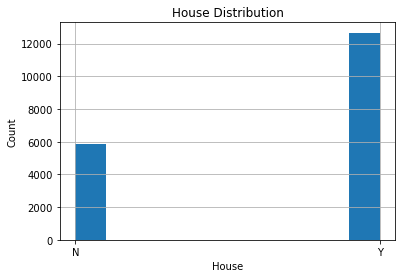

In [335]:
data_accept['own_house'].hist()
plt.xlabel('House')
plt.ylabel('Count')
plt.title('House Distribution')

#### Number of Childerns

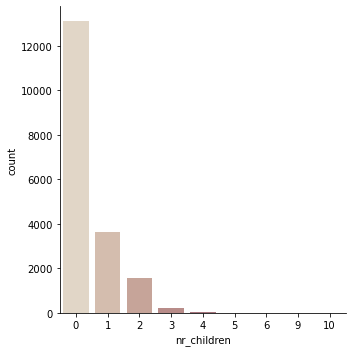

In [336]:
sns.catplot(x="nr_children", kind="count", palette="ch:.25", data=data_accept)

#### Income Type

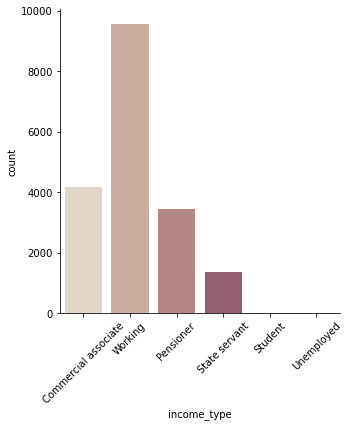

In [337]:
y = sns.catplot(x="income_type", kind="count", palette="ch:.25", data=data_accept)
y.set_xticklabels(rotation = 45)

#### Education Type

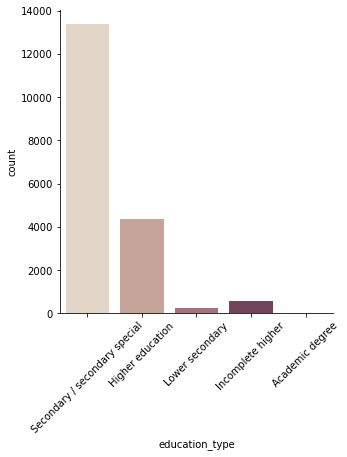

In [338]:
y = sns.catplot(x="education_type", kind="count", palette="ch:.25", data=data_accept)
y.set_xticklabels(rotation = 45)

#### Family Status

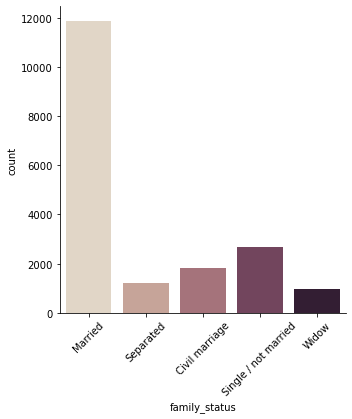

In [339]:
y = sns.catplot(x="family_status", kind="count", palette="ch:.25", data=data_accept)
y.set_xticklabels(rotation = 45)

#### Housing Type

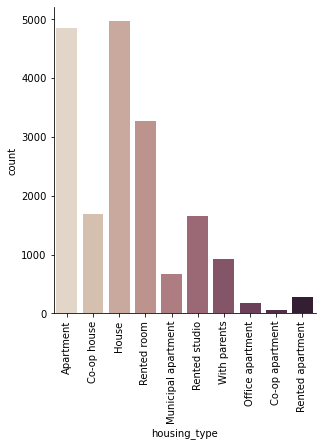

In [340]:
y = sns.catplot(x="housing_type", kind="count", palette="ch:.25", data=data_accept)
y.set_xticklabels(rotation = 90)

#### Default

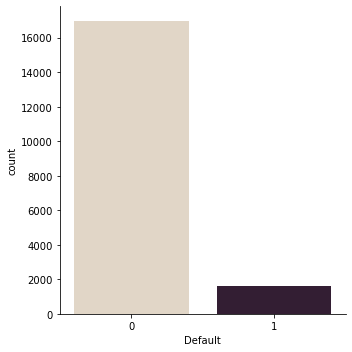

In [341]:
sns.catplot(x="Default", kind="count", palette="ch:.25", data=data_accept)

#### Default Based VS Family_status

<AxesSubplot:xlabel='family_status', ylabel='count'>

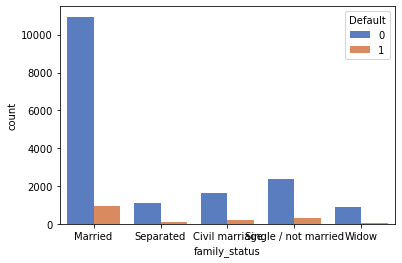

In [342]:
sns.countplot(x='family_status', data=data_accept, hue="Default", palette="muted") 


#### Default Based Vs Income Type

<AxesSubplot:xlabel='income_type', ylabel='count'>

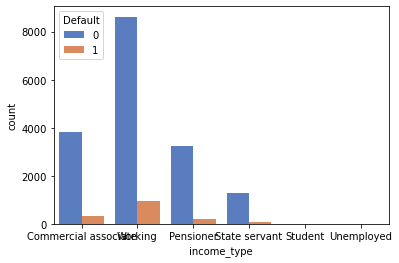

In [343]:
sns.countplot(x='income_type', data=data_accept,hue="Default", palette="muted") 

#### - Removing the columns
- Based on the % of NA Values I decided to remove EXT1.

- #### Accept

In [344]:
data_accept = data_accept.drop(['mobile_number','EXT1'], axis = 1)

- #### Reject

In [345]:
data_reject = data_reject.drop([ 'mobile_number','EXT1'], axis = 1)

#### - Check for the Outliers

- #### Accept 

In [346]:
# Data exploration: Boxplots (seperated by value ranges)
fig = go.Figure()

for col in ["total_income", "loan_amount" , "days_employed"]:
    fig.add_trace(go.Box(x=data_accept[col], name=col))
fig.show()

#### - Reject 

In [347]:
# Data exploration: Boxplots (seperated by value ranges)
fig = go.Figure()

for col in ["total_income", "loan_amount" , "days_employed"]:
    fig.add_trace(go.Box(x=data_reject[col], name=col))
fig.show()

#### Treating the outliers
- In order to treat the outliers I am using Wnisorization method and I am using "loan_amount", "total_income" columns.
- The winsorized mean is an averaging method that involves replacing the smallest and largest values of a data set with the observations closest to them.
- It mitigates the effects of outliers by replacing them with less extreme values.

In [348]:
from scipy import stats
data_accept = data_accept.copy()
cols = ["loan_amount", "total_income"]

# 5% winsorization (2-sided -> 2.5% bottom, 97.5% top)
perc = 0.05

# winsorize column
data_accept[cols] = data_accept[cols].apply(stats.mstats.winsorize, limits=(perc/2, perc/2))

##### - Categorical Variables
- Checking for the Categorical Variables and encoding them manually.
- categorical_vars = ['own_house','own_car', 'income_type' , 'education_type', 'family_status', 'housing_type', 'occupation_type']

- #### Accept

In [349]:
data_accept['own_house'].replace({"Y": 1, "N": 0}, inplace=True)
data_accept['own_car'].replace({"Y": 1, "N": 0}, inplace=True)
data_accept['income_type'].replace({"Commercial associate": 1, "Working": 2, "Pensioner": 3, "State servant": 4, "Student": 5, "Unemployed": 6}, inplace=True)
data_accept['education_type'].replace({"Secondary / secondary special": 1, "Higher education": 2, "Lower secondary": 3, "Incomplete higher": 4, "Academic degree": 5}, inplace=True)
data_accept['family_status'].replace({"Married": 1, "Separated": 2, "Civil marriage": 3, "Single / not married": 4, "Widow": 5}, inplace=True)
data_accept['housing_type'].replace({"Apartment": 1, "Co-op house": 2, "House": 3, "Rented room": 4, "Municipal apartment": 5 , "Rented studio": 6, "With parents": 7, "Office apartment": 8, "Co-op apartment": 9, "Rented apartment": 10}, inplace=True)
data_accept['occupation_type'].replace({'Drivers': 1, 'Laborers' : 2, 'Other' :3, 'Core staff': 4, 'Sales staff' : 5,
       'Private service staff' : 6, 'Security staff' : 7, 'Managers' : 8,
       'Cleaning staff' : 9, 'Medicine staff' : 10, 'Low-skill Laborers' : 11,
       'Accountants' : 12, 'High skill tech staff' : 13, 'Realty agents' : 14,
       'Cooking staff' : 15, 'HR staff' : 16, 'Secretaries' : 17, 'Waiters/barmen staff' : 18,
       'IT staff' : 19}, inplace=True)

- #### Reject

In [350]:
data_reject['own_house'].replace({"Y": 1, "N": 0}, inplace=True)
data_reject['own_car'].replace({"Y": 1, "N": 0}, inplace=True)
data_reject['income_type'].replace({"Commercial associate": 1, "Working": 2, "Pensioner": 3, "State servant": 4, "Student": 5, "Unemployed": 6}, inplace=True)
data_reject['education_type'].replace({"Secondary / secondary special": 1, "Higher education": 2, "Lower secondary": 3, "Incomplete higher": 4, "Academic degree": 5}, inplace=True)
data_reject['family_status'].replace({"Married": 1, "Separated": 2, "Civil marriage": 3, "Single / not married": 4, "Widow": 5}, inplace=True)
data_reject['housing_type'].replace({"Apartment": 1, "Co-op house": 2, "House": 3, "Rented room": 4, "Municipal apartment": 5 , "Rented studio": 6, "With parents": 7, "Office apartment": 8, "Co-op apartment": 9, "Rented apartment": 10}, inplace=True)
data_reject['occupation_type'].replace({'Drivers': 1, 'Laborers' : 2, 'Other' :3, 'Core staff': 4, 'Sales staff' : 5,
       'Private service staff' : 6, 'Security staff' : 7, 'Managers' : 8,
       'Cleaning staff' : 9, 'Medicine staff' : 10, 'Low-skill Laborers' : 11,
       'Accountants' : 12, 'High skill tech staff' : 13, 'Realty agents' : 14,
       'Cooking staff' : 15, 'HR staff' : 16, 'Secretaries' : 17, 'Waiters/barmen staff' : 18,
       'IT staff' : 19}, inplace=True)

## Modelling

In [351]:
# subset accept and reject data
cols = ['total_income', 'loan_amount', 'term', 'interest_rate','own_house','own_car', 'income_type' , 'education_type', 'family_status', 'housing_type', 'occupation_type', 'nr_children', 'region_population_ratio',
       'days_birth', 'days_employed', 'days_registration', 'phone_number',
       'email', 'days_phone_change', 'family_count',
       'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'Default']

accept = data_accept[cols]
reject = data_reject[[i for i in cols if i != "Default"]]

In [352]:
# train test split
X = accept[accept.columns[~accept.columns.isin(['Default'])]]
y = accept['Default']


In [353]:
#Split data in train (80%), test (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify = y, random_state=10)

#Split test in test (20%), validation (20%)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state=42)

#Reset Index 
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

In [354]:
# Class distribution
labels = ["Default - 0", "Default - 1"]
values = np.bincount(y_train)

print(X_train.shape, y_train.shape)
print(np.bincount(y_train))

donut = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5, marker_colors=["rgb(153, 214, 255)", "rgb(0, 92, 153)"])])
donut.show()

(11129, 26) (11129,)
[10178   951]


In [355]:
## Models
Tree               = DecisionTreeClassifier()
Logistic           = LogisticRegression(solver = "lbfgs", max_iter=1000)  
RandomForest       = RandomForestClassifier()                             
BoostedTree        = GradientBoostingClassifier()                                    
ADAboost           = AdaBoostClassifier()                                 
Neighbors          = KNeighborsClassifier()
models = {"Decision_Tree"      :Tree,
          "Logistic"           :Logistic,
          "RandomForest"       :RandomForest,
          "BoostedTree"        :BoostedTree,
          "ADAboost"           :ADAboost,
          "Neighbors"          :Neighbors,
         }

#### Fitting the models

In [356]:
# Fitting the Models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model} has been trained successfully")
performances_train = {}

Decision_Tree has been trained successfully
Logistic has been trained successfully
RandomForest has been trained successfully
BoostedTree has been trained successfully
ADAboost has been trained successfully
Neighbors has been trained successfully


In [357]:
for model in models:
    predictions   = models[model].predict(X_test)
    probabilities = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy      = accuracy_score(y_test,predictions)
    auc           = roc_auc_score(np.array(y_test),np.array(probabilities))
    performances_train[model] = {"Accuracy":accuracy,"AUC":auc}
pd.DataFrame(performances_train)

,Decision_Tree,Logistic,RandomForest,BoostedTree,ADAboost,Neighbors
Accuracy,0.837466,0.914555,0.914286,0.913477,0.914016,0.911051
AUC,0.537930,0.620308,0.712474,0.726676,0.714769,0.509968


#### Evaluation And Grid Search on all the Models

In [358]:
# evaluation metrics
def eval_metrics(proba, true):
    proba   = np.asarray(proba)
    true  = np.asarray(true, dtype=int)
    pred    = np.round(proba) # convert proba to binary labels

    auc         = roc_auc_score(true, proba)
    f1          = f1_score(true, pred)
    
    return {
        'AUC': auc,
        'F1': f1
    }

In [359]:
def run_GridSearch(name, data, model, param_grid, **kwargs):
    # save results
    metrics = kwargs.get("metrics", defaultdict(dict))

    #grid search parameters in grid_values
    #scoring is based on roc_auc -> outcome of gs is best model from grid search
    gs = GridSearchCV(model, param_grid = param_grid, scoring = kwargs.get("scoring", 'roc_auc'), cv=kwargs.get("cv", 3), refit=kwargs.get("refit", True))
    gs.fit(data["X_train"], data["y_train"])
    
    # predict
    proba_train   = gs.predict_proba(data["X_train"])[:,1]
    proba_valid   = gs.predict_proba(data["X_valid"])[:,1]

    # evaluate
    metrics[name]["train"] = eval_metrics(proba_train,data["y_train"])
    metrics[name]["valid"] = eval_metrics(proba_valid,data["y_valid"])

    # prints
    if kwargs.get("print", True):
        print(f"{name}: {gs.best_params_}")
        for key, val in metrics[name].items():
            print(f"{key}: ", "\t".join([f"{k}: {v:.4f}" for k,v in val.items()]))

        cmtx = pd.DataFrame(
        confusion_matrix(data["y_valid"], np.round(proba_valid)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])

        print(cmtx)
    
    return gs, metrics

#### Grid Search on Logistic

In [360]:
# Label rejects as defaulters

X_1 = pd.concat([X_train, reject], axis=0).reset_index(drop=True)
y_1 = np.append(y_train, np.ones(reject.shape[0]))

data_temp = {
    "X_train":X_1,
    "y_train":y_1,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

In [361]:
#Setup Grid search for logistic regression model
logistic = LogisticRegression()

models = {"logistic":logistic}

# grid search values 
grid_values = {
                "logistic":{
                    "solver":["liblinear"],
                    'penalty': ['l1', 'l2'],
                    'C':[0.25, 0.5, 1, 3], 
                    "max_iter":[200,300],
                    "class_weight": ["balanced"]
                }
                    
                
            }

In [362]:
import collections
from collections import defaultdict
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.5785	F1: 0.5397
valid:  AUC: 0.7117	F1: 0.2339
          pred:no  pred:yes
true:no      1936      1457
true:yes       82       235


In [363]:
#add model metrics to result dataframe
overview = pd.DataFrame(model_dict["logistic"].cv_results_)

#### Refitting the Model

In [364]:
model1 = LogisticRegression(**model_dict["logistic"].best_params_)
model1.fit(X_1, y_1)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model1.coef_[0], text=np.round(model1.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

#### Re-Fitting the Model 

In [365]:
# original data
data_temp = {
    "X_train":X_train,
    "y_train":y_train,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.7454	F1: 0.2719
valid:  AUC: 0.7126	F1: 0.2505
          pred:no  pred:yes
true:no      2313      1080
true:yes      117       200


In [366]:
# Refit selected model
model2 = LogisticRegression(**model_dict["logistic"].best_params_)
model2.fit(X_train, y_train)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model2.coef_[0], text=np.round(model2.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

#### Probablities

In [367]:
# get probabilities
pred_train = pd.DataFrame(model2.predict_proba(X_train))[1]
pred_reject = pd.DataFrame(model2.predict_proba(reject))[1]

# display probability distribution
fig = go.Figure()
fig.add_trace(go.Histogram(x=pred_train, name='train'))
fig.add_trace(go.Histogram(x=pred_reject, name='reject'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()

#### Cut-Off Probablities

In [368]:
# Label rejects based on cutoff

# Define 15% cutoff
cutoff_15 = int(len(pred_reject) * 0.15)

# Compute cutoff value
cutoff_value = np.max(np.sort(pred_reject)[:cutoff_15])
print("Cutoff probability: {:.3f}%".format(cutoff_value*100))

# Assign "Default" value to rejected loan applicants
y_reject = np.array(pred_reject > cutoff_value, dtype=int)

Cutoff probability: 23.047%


#### Incorporate labelled rejects with accepts

In [369]:
X_2 = pd.concat([X_train, reject], axis=0).reset_index(drop=True)
y_2 = np.append(y_train, y_reject)

data_temp = {
    "X_train":X_2,
    "y_train":y_2,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

#### Running GridSearch and Printing best parameters

In [370]:
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.6935	F1: 0.5781
valid:  AUC: 0.7102	F1: 0.2280
          pred:no  pred:yes
true:no      1977      1416
true:yes       94       223


#### Refitting the Model with Best Parameters

In [371]:
model3 = LogisticRegression(**model_dict["logistic"].best_params_)
model3.fit(X_2, y_2)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model3.coef_[0], text=np.round(model3.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

##### Incorporate labelled rejects with accepts

In [372]:
X_3 = pd.concat([X_train, reject], axis=0).reset_index(drop=True)
y_3 = np.append(y_train, np.round(pred_reject))

data_temp = {
    "X_train":X_3,
    "y_train":y_3,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

####  Run GridSearch and print best parameters

In [373]:
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.8856	F1: 0.6982
valid:  AUC: 0.7130	F1: 0.2553
          pred:no  pred:yes
true:no      2391      1002
true:yes      124       193


#### Refitting the selected model

In [374]:
model4 = LogisticRegression(**model_dict["logistic"].best_params_)
model4.fit(X_3, y_3)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model4.coef_[0], text=np.round(model4.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

#### All Models Together

In [375]:
model_overview = {
    "All default": model1,
    "Cutoff": model3,
    "Proba": model4
}

In [376]:
res_dict = defaultdict()

for name, model in model_overview.items():

    #Predict values for test set
    proba_test   = model.predict_proba(X_test)[:,1]

    #compute evaluation metrics
    res_dict[name] = eval_metrics(proba_test, y_test)
    res_dict[name]["params"] = model.get_params()

# display overview
pd.DataFrame(res_dict).T.sort_values("AUC", ascending=False)

,AUC,F1,params
Proba,0.723904,0.25218,"{'C': 0.25, 'class_weight': 'balanced', 'dual'..."
All default,0.723212,0.237614,"{'C': 0.25, 'class_weight': 'balanced', 'dual'..."
Cutoff,0.723204,0.24264,"{'C': 0.5, 'class_weight': 'balanced', 'dual':..."


#### - Based on AUC and F1 I will choose Proba, which is model 4 to make the prediction of default on data_reject.

In [377]:
features = ['total_income', 'loan_amount', 'term', 'interest_rate','own_house','own_car', 'income_type' , 'education_type', 'family_status', 'housing_type', 'occupation_type', 'nr_children', 'region_population_ratio',
       'days_birth', 'days_employed', 'days_registration', 'phone_number',
       'email', 'days_phone_change', 'family_count',
       'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7']

## Reject Inference Method
- Reject inference is a method for improving the quality of a credit scorecard by incorporating data from rejected loan applications. Bias can result if a credit scorecard model is built only on accepts and does not account for applications rejected because of past denials for credit or unknown nondefault status. 
- By using the reject inference method, we can infer the performance of rejects and include them in your credit scorecard model to remedy this bias.
- To develop a credit scorecard, we must identify each applicant as either "good" or "bad". For rejected applications, information to identify applicant as "good" or "bad" is not available. We cannot tell for sure to which group a applicant would have belonged had they been granted a loan. 
- The reject inference method allows us to infer whether a applicant would likely be "good" or "bad" enabling us to incorporate the rejected application data into the data set that we use to build a credit scorecard.

### Steps to be followed:

1. Build a logistic regression model based on the accepted data.

2. Infer the class of rejects using one of the reject inference techniques.

3. Combine the accepts and rejects into a single data set.

4. Create a new scorecard, bin the expanded data set, and build a new logistics model.

5. Validate the final model.

#### - Predicting on the reject

In [378]:
default_rj = model4.predict(data_reject[features])
data_reject['Default'] = default_rj

- #### Getting the columns in same order for both accept and reject.

In [379]:
data_accept = data_accept[cols]
data_reject = data_reject[cols]

In [380]:
print("Accept Data",data_accept.shape)
print("Reject Data", data_reject.shape)

Accept Data (18549, 27)
Reject Data (9112, 27)


#### Re Transforming all the Categorical Variables

#### - Accept

In [381]:
data_accept['own_house'].replace({ 1: "Y", 0 : "N"}, inplace=True)
data_accept['own_car'].replace({ 1 : "Y", 0 : "N"}, inplace=True)
data_accept['income_type'].replace({ 1 : "Commercial associate", 2 : "Working", 3 : "Pensioner",  4 : "State servant", 5 :  "Student", 6 : "Unemployed"}, inplace=True)
data_accept['education_type'].replace({ 1 : "Secondary / secondary special", 2 : "Higher education", 3 : "Lower secondary",  4 : "Incomplete higher", 5 : "Academic degree"}, inplace=True)
data_accept['family_status'].replace({ 1 : "Married",  2 : "Separated", 3 : "Civil marriage",  4 : "Single / not married", 5 : "Widow"}, inplace=True)
data_accept['housing_type'].replace({ 1 : "Apartment",  2 : "Co-op house", 3 : "House", 4 : "Rented room",  5 : "Municipal apartment",  6 : "Rented studio", 7 : "With parents",  8 : "Office apartment",  9 : "Co-op apartment",  10 : "Rented apartment"}, inplace=True)
data_accept['occupation_type'].replace({ 1 : 'Drivers' , 2 : 'Laborers' , 3 : 'Other' ,  4 : 'Core staff',  5 : 'Sales staff' ,
        6 : 'Private service staff',  7 : 'Security staff', 8 : 'Managers' ,
       9 : 'Cleaning staff' ,  10 : 'Medicine staff',  11 : 'Low-skill Laborers' ,
        12 : 'Accountants' , 13 : 'High skill tech staff', 14 : 'Realty agents' ,
        15 : 'Cooking staff' ,  16 : 'HR staff' ,  17 : 'Secretaries' ,  18 : 'Waiters/barmen staff' ,
       19 : 'IT staff' }, inplace=True)

#### - Reject

In [382]:
data_reject['own_house'].replace({ 1: "Y", 0 : "N"}, inplace=True)
data_reject['own_car'].replace({ 1 : "Y", 0 : "N"}, inplace=True)
data_reject['income_type'].replace({ 1 : "Commercial associate", 2 : "Working", 3 : "Pensioner",  4 : "State servant", 5 :  "Student", 6 : "Unemployed"}, inplace=True)
data_reject['education_type'].replace({ 1 : "Secondary / secondary special", 2 : "Higher education", 3 : "Lower secondary",  4 : "Incomplete higher", 5 : "Academic degree"}, inplace=True)
data_reject['family_status'].replace({ 1 : "Married",  2 : "Separated", 3 : "Civil marriage",  4 : "Single / not married", 5 : "Widow"}, inplace=True)
data_reject['housing_type'].replace({ 1 : "Apartment",  2 : "Co-op house", 3 : "House", 4 : "Rented room",  5 : "Municipal apartment",  6 : "Rented studio", 7 : "With parents",  8 : "Office apartment",  9 : "Co-op apartment",  10 : "Rented apartment"}, inplace=True)
data_reject['occupation_type'].replace({ 1 : 'Drivers' , 2 : 'Laborers' , 3 : 'Other' ,  4 : 'Core staff',  5 : 'Sales staff' ,
        6 : 'Private service staff',  7 : 'Security staff', 8 : 'Managers' ,
       9 : 'Cleaning staff' ,  10 : 'Medicine staff',  11 : 'Low-skill Laborers' ,
        12 : 'Accountants' , 13 : 'High skill tech staff', 14 : 'Realty agents' ,
        15 : 'Cooking staff' ,  16 : 'HR staff' ,  17 : 'Secretaries' ,  18 : 'Waiters/barmen staff' ,
       19 : 'IT staff' }, inplace=True)

#### Concatinating the Accept And Reject Data 

In [383]:
final_data = pd.concat([data_accept, data_reject])

#### Binning 
- Binning, is a technique for reducing the cardinality of continuous and discrete data. Binning groups related values together in bins to reduce the number of distinct values.
- Binning improves resource utilization and model build response time dramatically without significant loss in model quality. 
- Binning improves model quality by strengthening the relationship between attributes.

### Weight of Evidence Binning
- The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.
- The WOE should be monotonic i.e. either growing or decreasing with the bins.
- Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.
- If the IV statistic is:
1. Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
2. 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
3. 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
4. 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
5. IV > 0.5, suspicious relationship

##### Total Income

In [384]:
from Binning import WOE
clage_woe = WOE.WOEEncoder(pred_var="total_income", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.015332,5
1,0.025,0.014516,4
2,0.050,0.014516,4
3,0.100,0.014051,3


#### Income type

In [385]:
# Apply WOE binning to the "Income_type" variable
clage_woe = WOE.WOEEncoder(pred_var="income_type", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

,stop_limit,iv_total,n_bins
0,0.010,0.082867,3
1,0.025,0.082867,3
2,0.050,0.082867,3
3,0.100,0.082867,3


In [386]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.05, q = 3)
# check bins assigned to job variable
final_data["income_type"].value_counts()

Fitted 4 bins for 'income_type' (levels=6)...


income_type_1    14513
income_type_4     8152
income_type_3     4996
Name: income_type, dtype: int64

#### Loan Amount

In [387]:
# Apply WOE binning to the "Income_type" variable
clage_woe = WOE.WOEEncoder(pred_var="loan_amount", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.081168,4
1,0.025,0.077133,3
2,0.050,0.077133,3
3,0.100,0.077133,3


In [388]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.010, q = 4)
# check bins assigned to job variable
final_data["loan_amount"].value_counts()

Detected 'float64' variable, automatically transformed using q=4 quantiles ... 
Fitted 5 bins for 'loan_amount' (levels=4)...


loan_amount_5    13914
loan_amount_1     6903
loan_amount_2     6844
Name: loan_amount, dtype: int64

#### Term

In [389]:
final_data['term'] = final_data['term'].astype(float)

In [390]:
# Apply WOE binning to the "term" variable
clage_woe = WOE.WOEEncoder(pred_var="term", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.004999,5
1,0.025,0.004690,3
2,0.050,0.004690,3
3,0.100,0.004690,3


#### interest_rate

In [391]:
# Apply WOE binning to the "interest_rate" variable
clage_woe = WOE.WOEEncoder(pred_var="interest_rate", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.017935,4
1,0.025,0.016650,3
2,0.050,0.016650,3
3,0.100,0.016650,3


#### Own Car

In [392]:
# Apply WOE binning to the "own_car" variable
clage_woe = WOE.WOEEncoder(pred_var="own_car", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

,stop_limit,iv_total,n_bins
0,0.010,0.015774,2
1,0.025,0.015774,2
2,0.050,0.015774,2
3,0.100,0.015774,2


#### Own_house

In [393]:
# Apply WOE binning to the "own_house" variable
clage_woe = WOE.WOEEncoder(pred_var="own_house", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

,stop_limit,iv_total,n_bins
0,0.010,0.007442,2
1,0.025,0.007442,2
2,0.050,0.007442,2
3,0.100,0.007442,2


#### nr_children

In [394]:
final_data['nr_children'] = final_data['nr_children'].astype(float)

In [395]:
# Apply WOE binning to the "nr_children" variable
clage_woe = WOE.WOEEncoder(pred_var="nr_children", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.001101,2
1,0.025,0.001101,2
2,0.050,0.001101,2
3,0.100,0.001101,2


#### Education type

In [396]:
# Apply WOE binning to the "education_type" variable
clage_woe = WOE.WOEEncoder(pred_var="education_type", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

,stop_limit,iv_total,n_bins
0,0.010,0.028754,3
1,0.025,0.028754,3
2,0.050,0.028754,3
3,0.100,0.028754,3


In [397]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.05, q = 3)
# check bins assigned to job variable
final_data["education_type"].value_counts()

Fitted 3 bins for 'education_type' (levels=5)...


education_type_3    21276
education_type_1     6375
education_type_2       10
Name: education_type, dtype: int64

#### Family Status

In [398]:
# Apply WOE binning to the "education_type" variable
clage_woe = WOE.WOEEncoder(pred_var="family_status", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

,stop_limit,iv_total,n_bins
0,0.010,0.0512,3
1,0.025,0.0512,3
2,0.050,0.0512,3
3,0.100,0.0512,3


In [399]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.05, q = 3)
# check bins assigned to job variable
final_data["family_status"].value_counts()

Fitted 4 bins for 'family_status' (levels=5)...


family_status_3    19072
family_status_4     6776
family_status_1     1813
Name: family_status, dtype: int64

#### House Type

In [400]:
# Apply WOE binning to the "housing_type" variable
clage_woe = WOE.WOEEncoder(pred_var="housing_type", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

,stop_limit,iv_total,n_bins
0,0.010,0.04403,3
1,0.025,0.04403,3
2,0.050,0.04403,3
3,0.100,0.04403,3


In [401]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.05, q = 3)
# check bins assigned to job variable
final_data["housing_type"].value_counts()

Fitted 3 bins for 'housing_type' (levels=10)...


housing_type_2    19498
housing_type_3     6006
housing_type_1     2157
Name: housing_type, dtype: int64

#### Population Ratio

In [402]:
# Apply WOE binning to the "region_population_ratio" variable
clage_woe = WOE.WOEEncoder(pred_var="region_population_ratio", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.049602,5
1,0.025,0.043198,3
2,0.050,0.043198,3
3,0.100,0.043198,3


In [403]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.010, q = 5)
# check bins assigned to job variable
final_data["region_population_ratio"].value_counts()

Detected 'float64' variable, automatically transformed using q=5 quantiles ... 
Fitted 6 bins for 'region_population_ratio' (levels=5)...


region_population_ratio_6    11309
region_population_ratio_2     5882
region_population_ratio_1     5656
region_population_ratio_3     4814
Name: region_population_ratio, dtype: int64

#### Birth Days

In [404]:
final_data['days_birth'] = final_data['days_birth'].astype(float)

In [405]:
# Apply WOE binning to the "days_birth" variable
clage_woe = WOE.WOEEncoder(pred_var="days_birth", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.173400,5
1,0.025,0.165177,4
2,0.050,0.150715,3
3,0.100,0.150715,3


In [406]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.010, q = 5)
# check bins assigned to job variable
final_data["days_birth"].value_counts()

Detected 'float64' variable, automatically transformed using q=5 quantiles ... 
Fitted 6 bins for 'days_birth' (levels=5)...


days_birth_6    11063
days_birth_1     5535
days_birth_2     5532
days_birth_3     5531
Name: days_birth, dtype: int64

#### Employed days

In [407]:
final_data['days_employed'] = final_data['days_employed'].astype(float)

In [408]:
# Apply WOE binning to the "days_employed" variable
clage_woe = WOE.WOEEncoder(pred_var="days_employed", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.136042,4
1,0.025,0.132850,3
2,0.050,0.132850,3
3,0.100,0.132850,3


In [409]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.010, q = 5)
# check bins assigned to job variable
final_data["days_employed"].value_counts()

Detected 'float64' variable, automatically transformed using q=5 quantiles ... 
Fitted 5 bins for 'days_employed' (levels=5)...


days_employed_4    11063
days_employed_5    11062
days_employed_1     5536
Name: days_employed, dtype: int64

#### Registration Days

In [410]:
# Apply WOE binning to the "days_registration" variable
clage_woe = WOE.WOEEncoder(pred_var="days_registration", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.091078,5
1,0.025,0.091078,5
2,0.050,0.079598,3
3,0.100,0.079598,3


In [411]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.010, q = 5)
# check bins assigned to job variable
final_data["days_registration"].value_counts()

Detected 'float64' variable, automatically transformed using q=5 quantiles ... 
Fitted 5 bins for 'days_registration' (levels=5)...


days_registration_5    16596
days_registration_1     5533
days_registration_2     5532
Name: days_registration, dtype: int64

#### Phone Change Days

In [412]:
# Apply WOE binning to the "days_phone_change" variable
clage_woe = WOE.WOEEncoder(pred_var="days_phone_change", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.124238,4
1,0.025,0.118431,3
2,0.050,0.118431,3
3,0.100,0.118431,3


In [413]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.010, q = 4)
# check bins assigned to job variable
final_data["days_phone_change"].value_counts()

Detected 'float64' variable, automatically transformed using q=4 quantiles ... 
Fitted 5 bins for 'days_phone_change' (levels=4)...


days_phone_change_5    13828
days_phone_change_1     6924
days_phone_change_2     6909
Name: days_phone_change, dtype: int64

#### Family Count

In [414]:
# Apply WOE binning to the "family_count" variable
clage_woe = WOE.WOEEncoder(pred_var="family_count", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.00093,3
1,0.025,0.00093,3
2,0.050,0.00093,3
3,0.100,0.00093,3


#### EXT 1

In [415]:
# Apply WOE binning to the "EXT1" variable
#clage_woe = WOE.WOEEncoder(pred_var="EXT2", target_var="Default")
#clage_woe.test_limit(final_data, q = 10)

#### EXT 2

In [416]:
# Apply WOE binning to the "EXT2" variable
clage_woe = WOE.WOEEncoder(pred_var="EXT2", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.803198,4
1,0.025,0.759794,3
2,0.050,0.759794,3
3,0.100,0.759794,3


In [417]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.010, q = 4)
# check bins assigned to job variable
final_data["EXT2"].value_counts()

Detected 'float64' variable, automatically transformed using q=4 quantiles ... 
Fitted 5 bins for 'EXT2' (levels=4)...


EXT2_5    13830
EXT2_1     6916
EXT2_2     6915
Name: EXT2, dtype: int64

#### EXT3

In [418]:
# Apply WOE binning to the "EXT3" variable
clage_woe = WOE.WOEEncoder(pred_var="EXT3", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.832155,4
1,0.025,0.832155,4
2,0.050,0.771119,3
3,0.100,0.771119,3


In [419]:
final_data = clage_woe.fit_transform(final_data, stop_limit=0.025, q = 4)
# check bins assigned to job variable
final_data["EXT3"].value_counts()

Detected 'float64' variable, automatically transformed using q=4 quantiles ... 
Fitted 5 bins for 'EXT3' (levels=4)...


EXT3_5    13808
EXT3_1     6949
EXT3_2     6904
Name: EXT3, dtype: int64

#### EXT 4

In [420]:
final_data['EXT4'] = final_data['EXT4'].astype(float)

In [421]:
# Apply WOE binning to the "EXT4" variable
clage_woe = WOE.WOEEncoder(pred_var="EXT4", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.0,1
1,0.025,0.0,1
2,0.050,0.0,1
3,0.100,0.0,1


#### EXT 5

In [422]:
final_data['EXT5'] = final_data['EXT5'].astype(float)

In [423]:
# Apply WOE binning to the "EXT5" variable
clage_woe = WOE.WOEEncoder(pred_var="EXT5", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.0,1
1,0.025,0.0,1
2,0.050,0.0,1
3,0.100,0.0,1


#### EXT 6

In [424]:
final_data['EXT6'] = final_data['EXT6'].astype(float)

In [425]:
# Apply WOE binning to the "EXT5" variable
clage_woe = WOE.WOEEncoder(pred_var="EXT6", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.0,1
1,0.025,0.0,1
2,0.050,0.0,1
3,0.100,0.0,1


#### EXT7

In [426]:
final_data['EXT7'] = final_data['EXT7'].astype(float)

In [427]:
# Apply WOE binning to the "EXT5" variable
clage_woe = WOE.WOEEncoder(pred_var="EXT7", target_var="Default")
clage_woe.test_limit(final_data, q = 10)

Detected 'float64' variable, automatically transformed using q=10 quantiles ... 


,stop_limit,iv_total,n_bins
0,0.010,0.0,1
1,0.025,0.0,1
2,0.050,0.0,1
3,0.100,0.0,1


#### - Dropping the variables based on the results above results.

In [428]:
final_data = final_data.drop(['loan_amount','term','nr_children'], axis = 1)

In [429]:
final_data.head(3)

,total_income,interest_rate,own_house,own_car,income_type,education_type,family_status,housing_type,occupation_type,region_population_ratio,...,email,days_phone_change,family_count,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,Default
0,157500.0,3.737395,N,Y,income_type_4,education_type_3,family_status_3,housing_type_2,Drivers,region_population_ratio_2,...,0,days_phone_change_5,2.0,EXT2_5,EXT3_1,0.0,0.0,0.0,0.0,0.0
1,76500.0,3.654300,Y,N,income_type_1,education_type_3,family_status_1,housing_type_3,Laborers,region_population_ratio_2,...,0,days_phone_change_1,4.0,EXT2_5,EXT3_2,0.0,1.0,0.0,0.0,0.0
2,67500.0,3.262865,N,Y,income_type_1,education_type_3,family_status_4,housing_type_2,Laborers,region_population_ratio_3,...,0,days_phone_change_2,2.0,EXT2_5,EXT3_1,0.0,1.0,0.0,0.0,1.0


In [430]:
final_data.columns

Index(['total_income', 'interest_rate', 'own_house', 'own_car', 'income_type',
       'education_type', 'family_status', 'housing_type', 'occupation_type',
       'region_population_ratio', 'days_birth', 'days_employed',
       'days_registration', 'phone_number', 'email', 'days_phone_change',
       'family_count', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'Default'],
      dtype='object')

In [431]:
features = final_data.loc[:, final_data.columns != 'Default']

#### Weight of Evidence Encoding on the final data

In [432]:
from category_encoders import WOEEncoder
woe_map = WOEEncoder(cols=features).fit(final_data, final_data['Default'])
final_data = woe_map.transform(final_data)

In [433]:
final_data.head(3)

,total_income,interest_rate,own_house,own_car,income_type,education_type,family_status,housing_type,occupation_type,region_population_ratio,...,email,days_phone_change,family_count,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,Default
0,0.042299,0.0,0.122972,-0.182352,-0.079248,0.086056,-0.150867,-0.091621,0.231244,-0.088311,...,-0.005643,0.280166,-0.103560,-0.293497,0.966808,-0.000071,-0.382366,-0.000115,-0.001204,0.0
1,0.036183,0.0,-0.060681,0.086397,0.204735,0.086056,-0.008464,0.012464,0.250497,-0.088311,...,-0.005643,-0.570105,0.051555,-0.293497,-1.528339,-0.000071,0.089350,-0.000115,-0.001204,0.0
2,0.077173,0.0,0.122972,-0.182352,0.204735,0.086056,0.363870,-0.091621,0.250497,-0.405261,...,-0.005643,-0.145987,-0.103560,-0.293497,0.966808,-0.000071,0.089350,-0.000115,-0.001204,1.0


#### Modelling on final dataset

In [434]:
features = ['total_income', 'interest_rate', 'own_house', 'own_car', 'income_type',
       'education_type', 'family_status', 'housing_type', 'occupation_type',
       'region_population_ratio', 'days_birth', 'days_employed',
       'days_registration', 'phone_number', 'email', 'days_phone_change',
       'family_count', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7']

In [438]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data[features], final_data['Default'], test_size=0.3, random_state=123)
logfit = Logistic.fit(X_train,Y_train)
coefficients = pd.concat([pd.DataFrame(final_data[features].columns),pd.DataFrame(np.transpose(logfit.coef_))], axis = 1)
coefficients.columns = ['Feature','Coeff']
coefficients

,Feature,Coeff
0,total_income,0.899895
1,interest_rate,0.000000
2,own_house,0.266105
3,own_car,1.082351
4,income_type,0.297138
5,education_type,0.665197
6,family_status,0.624236
7,housing_type,0.366049
8,occupation_type,0.224480
9,region_population_ratio,0.123484


#### Train

In [439]:
coefficients = coefficients.set_index('Feature')
score_train = X_train[coefficients.index].apply(lambda x: x*coefficients['Coeff'].T,axis=1)
score_train['Default'] = Y_train
score_train['logit'] = score_train[list(score_train.columns)].sum(axis=1)

In [441]:
targetscore = 900
odds = 30
double_odds = 20
factor = double_odds/np.log(2)
offset = targetscore - factor * np.log(odds)
score_train['score'] = offset - factor * score_train['logit']
score_train.head(3)

,total_income,interest_rate,own_house,own_car,income_type,education_type,family_status,housing_type,occupation_type,region_population_ratio,...,family_count,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,Default,logit,score
15446,0.050719,0.0,0.032723,0.093511,0.060834,0.057244,-0.005284,-0.033538,-0.069289,0.021901,...,-0.034722,-0.275368,-0.188288,0.000013,0.046211,3.505903e-09,-0.00052,0.0,0.103048,798.888840
6053,-0.124292,0.0,-0.016147,0.093511,0.060834,-0.217296,-0.094176,-0.033538,-0.045291,0.021901,...,-0.034722,-1.365077,-0.188288,0.000013,0.046211,3.505903e-09,-0.00052,0.0,-1.747998,852.298736
7268,0.039204,0.0,-0.016147,0.093511,0.060834,0.057244,-0.094176,-0.033538,0.068379,0.021901,...,-0.034722,0.999729,-1.498722,0.000013,0.046211,3.505903e-09,-0.00052,0.0,-0.396207,813.294312


In [442]:
print("Maximum Score",score_train.score.max())
print("Minimum Score",score_train.score.min())

Maximum Score 948.3989257206584
Minimum Score 649.955928305477


#### Distribution for Train

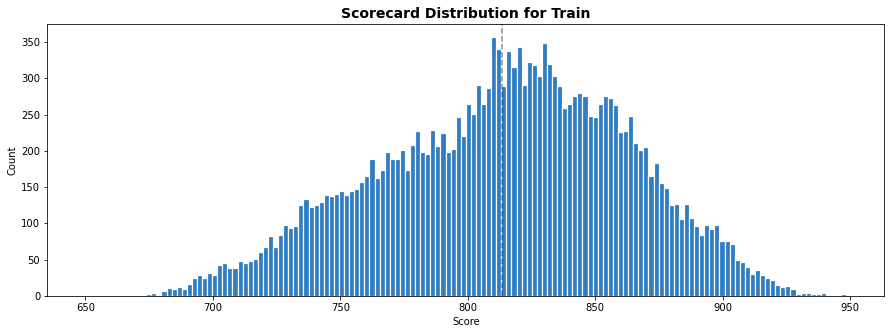

In [443]:
plt.figure(figsize=(15,5))

plt.hist(score_train['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution for Train', fontweight="bold", fontsize=14)
plt.axvline(score_train['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count');

#### Score Card for train

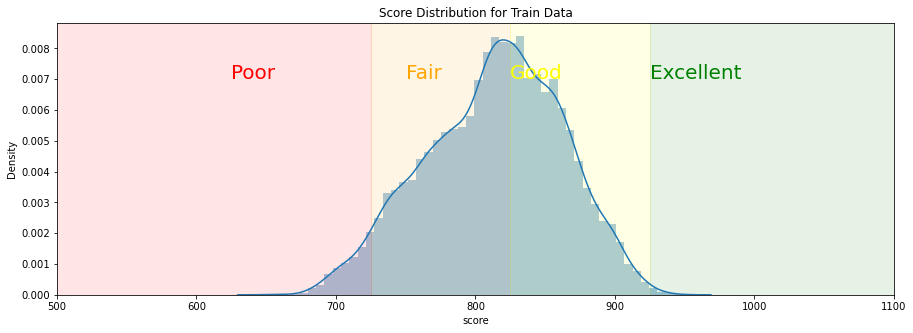

In [506]:
f, axes = plt.subplots(figsize=(15,5))
plt.xlim(500,1100)
sns.distplot(score_train['score'], bins = 50)
plt.axvspan(400,725, alpha=0.1, color='red')
plt.axvspan(725,825, alpha=0.1, color='orange')
plt.axvspan(825,925, alpha=0.1, color='yellow')
plt.axvspan(925,1200, alpha=0.1, color='green')
plt.text(625, 0.007, 'Poor', color='red', fontsize=20)
plt.text(750, 0.007, 'Fair', color='orange',  fontsize=20)
plt.text(825, 0.007, 'Good', color='yellow', fontsize=20)
plt.text(925, 0.007, 'Excellent', color='green', fontsize=20)
plt.title('Score Distribution for Train Data')
plt.show()

#### Score Card on Test Data

In [467]:
def scorecard(data, model, target=900, target_odds=30, pdo=20):
    coefficients = pd.concat([pd.DataFrame(data[features].columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
    coefficients.columns = ['Feature','Coef']
    coefficients = coefficients.set_index('Feature')
    
    scorecard = data[coefficients.index].apply(lambda x: x*coefficients['Coef'].T,axis=1)

    scorecard['logit'] = scorecard[list(scorecard.columns)].sum(axis=1)

    factor = pdo/np.log(2)
    offset = target - factor * np.log(target_odds)

    scorecard['score'] = offset - factor * scorecard['logit']


    return scorecard

In [468]:
score_test = scorecard(X_test, Logistic)
score_test.head(3)

,total_income,interest_rate,own_house,own_car,income_type,education_type,family_status,housing_type,occupation_type,region_population_ratio,...,days_phone_change,family_count,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,logit,score
12471,0.038065,0.0,-0.016147,0.093511,0.060834,-0.217296,-0.094176,0.004562,-0.049833,0.021901,...,0.107489,-0.034722,-0.275368,-0.188288,0.000013,0.046211,3.505903e-09,-0.00052,-0.462374,815.203489
16353,0.102611,0.0,-0.016147,0.093511,-0.185991,0.057244,-0.094176,-0.033538,-0.069289,0.021901,...,-0.056010,-0.034722,-0.275368,-1.498722,0.000013,-0.197757,3.505903e-09,-0.00052,-2.390730,870.844079
4941,-0.125715,0.0,-0.016147,-0.197369,0.060834,0.057244,-0.094176,-0.033538,-0.069289,-0.010905,...,0.107489,0.017285,0.999729,-0.188288,0.000013,0.046211,3.505903e-09,-0.00052,0.646657,783.203602


In [469]:
print("Maximum Score",score_test.score.max())
print("Minimum Score",score_test.score.min())

Maximum Score 946.8328845943616
Minimum Score 670.0019435053566


#### Distribution of Scores

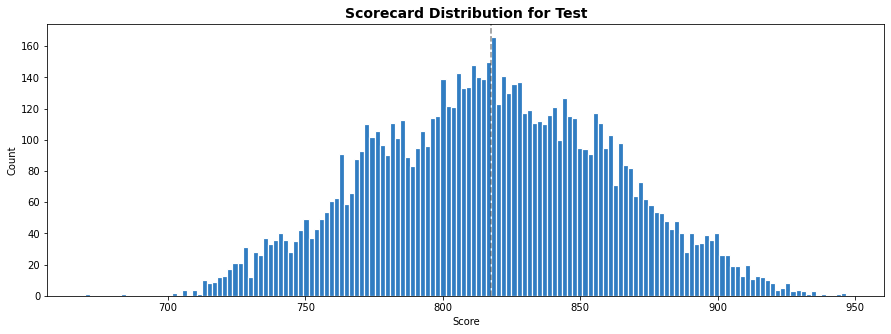

In [470]:
plt.figure(figsize=(15,5))

plt.hist(score_test['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution for Test', fontweight="bold", fontsize=14)
plt.axvline(score_test['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count');

#### Score Card for Test Data

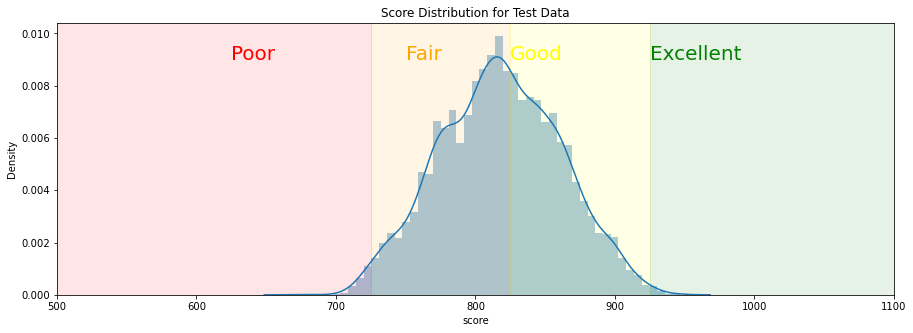

In [510]:
f, axes = plt.subplots(figsize=(15,5))
plt.xlim(500,1100)
sns.distplot(score_test['score'], bins = 50)
plt.axvspan(400,725, alpha=0.1, color='red')
plt.axvspan(725,825, alpha=0.1, color='orange')
plt.axvspan(825,925, alpha=0.1, color='yellow')
plt.axvspan(925,1200, alpha=0.1, color='green')
plt.text(625, 0.009, 'Poor', color='red', fontsize=20)
plt.text(750, 0.009, 'Fair', color='orange',  fontsize=20)
plt.text(825, 0.009, 'Good', color='yellow', fontsize=20)
plt.text(925, 0.009, 'Excellent', color='green', fontsize=20)
plt.title('Score Distribution for Test Data')
plt.show()

#### Entire Data Set

In [472]:
logreg = LogisticRegression().fit(final_data[features], final_data['Default'])
score_final = scorecard(final_data, logreg)
score_final.head(3)

,total_income,interest_rate,own_house,own_car,income_type,education_type,family_status,housing_type,occupation_type,region_population_ratio,...,days_phone_change,family_count,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,logit,score
0,0.037984,0.0,0.034247,-0.188250,-0.021478,0.054135,-0.081918,-0.038739,0.056376,-0.010327,...,0.122358,-0.021340,-0.279824,0.967090,0.000012,-0.179852,1.751447e-09,-0.000567,0.773071,779.556065
1,0.032492,0.0,-0.016899,0.089191,0.055488,0.054135,-0.004596,0.005270,0.061070,-0.010327,...,-0.248984,0.010623,-0.279824,-1.528785,0.000012,0.042027,1.751447e-09,-0.000567,-1.517146,845.637762
2,0.069302,0.0,0.034247,-0.188250,0.055488,0.054135,0.197574,-0.038739,0.061070,-0.047391,...,-0.063757,-0.021340,-0.279824,0.967090,0.000012,0.042027,1.751447e-09,-0.000567,1.203430,767.138537


In [473]:
print("Maximum Score",score_final.score.max())
print("Minimum Score",score_final.score.min())

Maximum Score 950.9144936986005
Minimum Score 674.026627955137


#### Plotting the Distribution of Scores

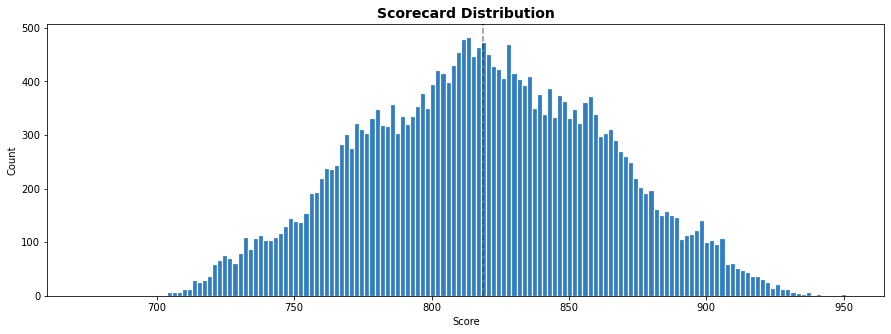

In [474]:
plt.figure(figsize=(15,5))

plt.hist(score_final['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(score_final['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Count');

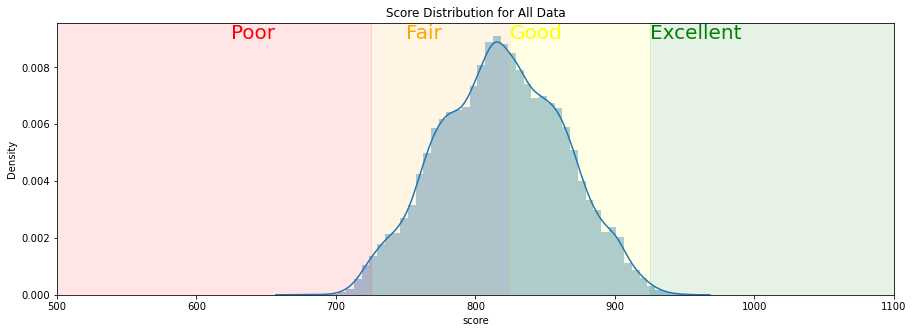

In [509]:
f, axes = plt.subplots(figsize=(15,5))
plt.xlim(500,1100)
sns.distplot(score_final['score'], bins = 50)
plt.axvspan(400,725, alpha=0.1, color='red')
plt.axvspan(725,825, alpha=0.1, color='orange')
plt.axvspan(825,925, alpha=0.1, color='yellow')
plt.axvspan(925,1200, alpha=0.1, color='green')
plt.text(625, 0.009, 'Poor', color='red', fontsize=20)
plt.text(750, 0.009, 'Fair', color='orange',  fontsize=20)
plt.text(825, 0.009, 'Good', color='yellow', fontsize=20)
plt.text(925, 0.009, 'Excellent', color='green', fontsize=20)
plt.title('Score Distribution for All Data')
plt.show()

#### Refrences
- https://blogs.sas.com/content/subconsciousmusings/2019/01/18/building-credit-scorecards-using-statistical-methods-and-business-logic/
- https://fr.mathworks.com/help/risk/reject-inference-for-credit-scorecards.html
- https://towardsdatascience.com/churn-analysis-information-value-and-weight-of-evidence-6a35db8b9ec5
- Class Slides and Code

## Cost Sensitivity

- Performing the cost sensitivity on the accept data.
- Loss given default is defined as 75%, risk-free interest rate is defined as 1.5%

In [285]:
data_accept['own_house'].replace({"Y": 1, "N": 0}, inplace=True)
data_accept['own_car'].replace({"Y": 1, "N": 0}, inplace=True)
data_accept['income_type'].replace({"Commercial associate": 1, "Working": 2, "Pensioner": 3, "State servant": 4, "Student": 5, "Unemployed": 6}, inplace=True)
data_accept['education_type'].replace({"Secondary / secondary special": 1, "Higher education": 2, "Lower secondary": 3, "Incomplete higher": 4, "Academic degree": 5}, inplace=True)
data_accept['family_status'].replace({"Married": 1, "Separated": 2, "Civil marriage": 3, "Single / not married": 4, "Widow": 5}, inplace=True)
data_accept['housing_type'].replace({"Apartment": 1, "Co-op house": 2, "House": 3, "Rented room": 4, "Municipal apartment": 5 , "Rented studio": 6, "With parents": 7, "Office apartment": 8, "Co-op apartment": 9, "Rented apartment": 10}, inplace=True)
data_accept['occupation_type'].replace({'Drivers': 1, 'Laborers' : 2, 'Other' :3, 'Core staff': 4, 'Sales staff' : 5,
       'Private service staff' : 6, 'Security staff' : 7, 'Managers' : 8,
       'Cleaning staff' : 9, 'Medicine staff' : 10, 'Low-skill Laborers' : 11,
       'Accountants' : 12, 'High skill tech staff' : 13, 'Realty agents' : 14,
       'Cooking staff' : 15, 'HR staff' : 16, 'Secretaries' : 17, 'Waiters/barmen staff' : 18,
       'IT staff' : 19}, inplace=True)

In [286]:
# train test split
X = data_accept[data_accept.columns[~data_accept.columns.isin(['Default'])]]
y = data_accept['Default']

#Split data in train (60%), test (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state=42)

#Split test in test (20%), validation (20%)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state=42)

#Reset Index 
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

In [287]:
# Annuity
def A(am, ir_c, n):
    return am * (ir_c*(1+ir_c)**n) / ((1+ir_c)**n - 1)

# Present Value
def PV(A, ir_rf, n):
    return A * (1-1/((1+ir_rf)**n)) / ir_rf

# Future Value
def FV(am, ir, n):
    return am * (1+ir)**n

In [288]:
def cost_FP(am, n, ir_c, ir_rf=0.015):
    return PV(A(am,ir_c,n),ir_rf,n) - am

def cost_FN(am, lgd=0.75):
    return am*lgd

In [291]:
X_train.head(3)

,total_income,loan_amount,term,interest_rate,own_house,own_car,income_type,education_type,family_status,housing_type,...,phone_number,email,days_phone_change,family_count,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7
0,90000.0,675000.0,60,3.501219,1,1,2,1,1,1,...,0,0,0.0,3.0,0.616699,0.457900,0,1,0,0
1,180000.0,679500.0,48,3.353746,1,1,2,1,1,1,...,0,1,-456.0,3.0,0.757468,0.531686,0,1,0,0
2,157500.0,679500.0,12,3.972169,1,1,1,1,1,1,...,0,0,-4.0,2.0,0.655842,0.501075,0,0,0,1


In [292]:
# compute cost matrix
# transform months -> years

cm_train = pd.DataFrame()
cm_train["cFP"] = cost_FP(X_train["loan_amount"], X_train["term"]/12, X_train["interest_rate"]/100)
cm_train["cFN"] = cost_FN(X_train["loan_amount"])
cm_train["cTP"] = 0.0
cm_train["cTN"] = 0.0

cm_valid = pd.DataFrame()
cm_valid["cFP"] = cost_FP(X_valid["loan_amount"], X_valid["term"]/12, X_valid["interest_rate"]/100)
cm_valid["cFN"] = cost_FN(X_valid["loan_amount"])
cm_valid["cTP"] = 0.0
cm_valid["cTN"] = 0.0

cm_test = pd.DataFrame()
cm_test["cFP"] = cost_FP(X_test["loan_amount"], X_test["term"]/12, X_test["interest_rate"]/100)
cm_test["cFN"] = cost_FN(X_test["loan_amount"])
cm_test["cTP"] = 0.0
cm_test["cTN"] = 0.0

In [293]:
def total_cost(true, pred, cTP, cFN, cFP, cTN):
    return true*(pred*cTP+(1-pred)*cFN)+(1-true)*(pred*cFP+(1-pred)*cTN)

In [294]:
# Average cost
weights_avg_cost = {0:1, 1:np.mean(cm_train["cFN"] / cm_train["cFP"])}
print("Avg. cost:", weights_avg_cost)

# Inverse class distribution
c0, c1 = np.bincount(y_train)
weights_inv = {0:1,1:c0/c1}
print("Inv. class distribution:", weights_inv)

Avg. cost: {0: 1, 1: 29.962776216254632}
Inv. class distribution: {0: 1, 1: 10.70241850683491}


In [295]:
# evaluation metrics
def eval_metrics(proba, true, cm, t=0.5):
    proba = np.asarray(proba)
    true = np.asarray(true, dtype=int)
    pred = np.array(proba > t, dtype=int) # probability threshold

    auc = roc_auc_score(true, proba)
    f1 = f1_score(true, pred)
    cost = np.sum(total_cost(true, pred, **cm))

    return {
        'AUC': auc,
        'F1': f1,
        "Cost": cost,
    }

In [296]:
#Setup Grid search for logistic regression model
logistic = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

models = {"logistic":logistic, "rf":rf}

# grid search values 
grid_values = {
                "logistic":{
                    "solver":["liblinear"],
                    'penalty': ['l1', 'l2'],
                    'C':[0.25, 0.5, 1, 3], 
                    "max_iter":[200,300],
                    "class_weight": ["balanced"] # can be extended to custom class weights
                },
                "rf":{
                    "max_depth":np.arange(2,11,1),
                    "class_weight": ["balanced"] # can be extended to custom class weights
                }
            }

In [297]:
def run_GridSearch(name, data, model, param_grid, **kwargs):
    # save results
    metrics = kwargs.get("metrics", defaultdict(dict))

    #grid search parameters in grid_values
    #scoring is based on roc_auc -> outcome of gs is best model from grid search
    gs = GridSearchCV(model, param_grid = param_grid, scoring = kwargs.get("scoring", 'roc_auc'), cv=kwargs.get("cv", 3), refit=kwargs.get("refit", True))
    gs.fit(data["X_train"], data["y_train"])
    
    # predict
    proba_train   = gs.predict_proba(data["X_train"])[:,1]
    proba_valid   = gs.predict_proba(data["X_valid"])[:,1]

    # evaluate
    metrics[name]["train"] = eval_metrics(proba_train,data["y_train"],data["cm_train"])
    metrics[name]["valid"] = eval_metrics(proba_valid,data["y_valid"],data["cm_valid"])

    # prints
    if kwargs.get("print", True):
        print(f"{name}: {gs.best_params_}")
        for key, val in metrics[name].items():
            print(f"{key}: ", "\t".join([f"{k}: {v:.4f}" for k,v in val.items()]))

        cmtx = pd.DataFrame(
        confusion_matrix(data["y_valid"], np.round(proba_valid)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])

        print(cmtx)
    
    return gs, metrics

In [298]:
data_temp = {
    "X_train":X_train,
    "y_train":y_train,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train,
    "cm_valid":cm_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.7439	F1: 0.2693	Cost: 206208218.3154
valid:  AUC: 0.7154	F1: 0.2520	Cost: 74239860.5409
          pred:no  pred:yes
true:no      2281      1112
true:yes      111       206
rf: {'class_weight': 'balanced', 'max_depth': 4}
train:  AUC: 0.7809	F1: 0.2949	Cost: 194607533.0541
valid:  AUC: 0.7086	F1: 0.2506	Cost: 79029381.4896
          pred:no  pred:yes
true:no      2363      1030
true:yes      124       193


In [300]:
# save performance validation
EVAL = metric_dict.copy()

# evaluate on test set
# Note: I did not ask for this in the exercises
EVAL["logistic"]["test"] = eval_metrics(model_dict["logistic"].predict_proba(X_test)[:,1], y_test, cm_test)
EVAL["rf"]["test"] = eval_metrics(model_dict["rf"].predict_proba(X_test)[:,1], y_test, cm_test)

In [301]:
def tune_threshold(true, proba, cm):
    thresholds = np.arange(0, 1, 0.001)
    costs = [np.sum(total_cost(true, np.array(proba > t, dtype=int), **cm)) for t in thresholds]
    return thresholds, costs

In [302]:
# Logistic Regression

thresholds, costs = tune_threshold(y_train, model_dict["logistic"].predict_proba(X_train)[:,1], cm_train)

# best threshold
index = np.argmin(costs)
print(f"Threshold: {thresholds[index]:.3f}\tCost: {costs[index]:.0f}")

# evaluate cutoff on all data sets
EVAL["logistic+cutoff"]["train"] = eval_metrics(model_dict["logistic"].predict_proba(X_train)[:,1], y_train, cm_train, t=thresholds[np.argmin(costs)])
EVAL["logistic+cutoff"]["valid"] = eval_metrics(model_dict["logistic"].predict_proba(X_valid)[:,1], y_valid, cm_valid, t=thresholds[np.argmin(costs)])
EVAL["logistic+cutoff"]["test"] = eval_metrics(model_dict["logistic"].predict_proba(X_test)[:,1], y_test, cm_test, t=thresholds[np.argmin(costs)])
print(EVAL["logistic+cutoff"])

# Number of accepted applicants = pred:no = 78
cmtx = pd.DataFrame(
        confusion_matrix(y_valid, np.array(model_dict["logistic"].predict_proba(X_valid)[:,1] > thresholds[np.argmin(costs)], dtype=int)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])
print(cmtx)

Threshold: 0.270	Cost: 176177361
{'train': {'AUC': 0.7438593043820004, 'F1': 0.19451317912856375, 'Cost': 176177360.5193741}, 'valid': {'AUC': 0.7153798737612509, 'F1': 0.1845756695708293, 'Cost': 66668665.66133889}, 'test': {'AUC': 0.7270795969806086, 'F1': 0.18950064020486557, 'Cost': 61637761.60755843}}
          pred:no  pred:yes
true:no       897      2496
true:yes       31       286


In [303]:
# Plot cost for all cutoffs
fig = go.Figure(data=go.Scatter(x=thresholds, y=costs))
fig.add_hline(y=np.min(costs), line_dash="dot", line_color="black")
fig.add_vline(x=thresholds[np.argmin(costs)], line_dash="dot", line_color="black")
fig.update_layout(
    title="Logistic Regression",
    xaxis_title="Threshold",
    yaxis_title="Cost"
)
fig.show()

#### Random Forest

In [304]:
# Random Forest 

thresholds, costs = tune_threshold(y_train, model_dict["rf"].predict_proba(X_train)[:,1], cm_train)

# best threshold
index = np.argmin(costs)
print(f"Threshold: {thresholds[index]:.3f}\tCost: {costs[index]:.0f}")

# evaluate cutoff on all data sets
EVAL["rf+cutoff"]["train"] = eval_metrics(model_dict["rf"].predict_proba(X_train)[:,1], y_train, cm_train, t=thresholds[np.argmin(costs)])
EVAL["rf+cutoff"]["valid"] = eval_metrics(model_dict["rf"].predict_proba(X_valid)[:,1], y_valid, cm_valid, t=thresholds[np.argmin(costs)])
EVAL["rf+cutoff"]["test"] = eval_metrics(model_dict["rf"].predict_proba(X_test)[:,1], y_test, cm_test, t=thresholds[np.argmin(costs)])
print(EVAL["rf+cutoff"])

# Number of accepted applicants = pred:no = 1394
cmtx = pd.DataFrame(
        confusion_matrix(y_valid, np.array(model_dict["rf"].predict_proba(X_valid)[:,1] > thresholds[np.argmin(costs)], dtype=int)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])
print(cmtx)

Threshold: 0.376	Cost: 153574618
{'train': {'AUC': 0.7809184734646532, 'F1': 0.21304296366433897, 'Cost': 153574617.67354172}, 'valid': {'AUC': 0.7086151577612472, 'F1': 0.19472759226713532, 'Cost': 65543961.82553482}, 'test': {'AUC': 0.7223826006595504, 'F1': 0.1986013986013986, 'Cost': 62933477.47833365}}
          pred:no  pred:yes
true:no      1142      2251
true:yes       40       277


In [309]:
# Plot cost for all cutoffs
fig = go.Figure(data=go.Scatter(x=thresholds, y=costs))
fig.add_hline(y=np.min(costs), line_dash="dot", line_color="black")
fig.add_vline(x=thresholds[np.argmin(costs)], line_dash="dot", line_color="black")
fig.update_layout(
    title="Random Forest",
    xaxis_title="Threshold",
    yaxis_title="Cost"
)
fig.show()

#### SMOTE

In [310]:
# conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [311]:
# setup sampling techniques

# SMOTE
sample_over = SMOTE(random_state=42)
X_train_over, y_train_over = sample_over.fit_resample(X_train, y_train)

# RandomUnderSampler
sample_under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = sample_under.fit_resample(X_train, y_train)

print(f"SMOTE: {np.bincount(y_train_over)}")
print(f"Random Undersampling: {np.bincount(y_train_under)}")

SMOTE: [10178 10178]
Random Undersampling: [951 951]


In [313]:
# compute new cost matrix
cm_train_over = pd.DataFrame()
cm_train_over["cFP"] = cost_FP(X_train_over["loan_amount"], X_train_over["term"]/12, X_train_over["interest_rate"]/100)
cm_train_over["cFN"] = cost_FN(X_train_over["loan_amount"])
cm_train_over["cTP"] = 0.0
cm_train_over["cTN"] = 0.0

data_temp = {
    "X_train":X_train_over,
    "y_train":y_train_over,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train_over,
    "cm_valid":cm_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)
    EVAL[name+"+over"]["train"] = eval_metrics(model_dict[name].predict_proba(X_train)[:,1], y_train, cm_train)
    EVAL[name+"+over"]["valid"] = eval_metrics(model_dict[name].predict_proba(X_valid)[:,1], y_valid, cm_valid)
    EVAL[name+"+over"]["test"] = eval_metrics(model_dict[name].predict_proba(X_test)[:,1], y_test, cm_test)

logistic: {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.8692	F1: 0.7921	Cost: 994376820.1348
valid:  AUC: 0.6356	F1: 0.2193	Cost: 95233658.0670
          pred:no  pred:yes
true:no      2638       755
true:yes      185       132
rf: {'class_weight': 'balanced', 'max_depth': 10}
train:  AUC: 0.9730	F1: 0.9216	Cost: 297133043.8270
valid:  AUC: 0.6641	F1: 0.2119	Cost: 110532036.6732
          pred:no  pred:yes
true:no      2959       434
true:yes      228        89


In [314]:
# compute new cost matrix
cm_train_under = pd.DataFrame()
cm_train_under["cFP"] = cost_FP(X_train_under["loan_amount"], X_train_under["term"]/12, X_train_under["interest_rate"]/100)
cm_train_under["cFN"] = cost_FN(X_train_under["loan_amount"])
cm_train_under["cTP"] = 0.0
cm_train_under["cTN"] = 0.0

data_temp = {
    "X_train":X_train_under,
    "y_train":y_train_under,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train_under,
    "cm_valid":cm_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)
    EVAL[name+"+under"]["train"] = eval_metrics(model_dict[name].predict_proba(X_train)[:,1], y_train, cm_train)
    EVAL[name+"+under"]["valid"] = eval_metrics(model_dict[name].predict_proba(X_valid)[:,1], y_valid, cm_valid)
    EVAL[name+"+under"]["test"] = eval_metrics(model_dict[name].predict_proba(X_test)[:,1], y_test, cm_test)

logistic: {'C': 1, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.7405	F1: 0.6728	Cost: 156199535.5945
valid:  AUC: 0.7157	F1: 0.2517	Cost: 74710104.3097
          pred:no  pred:yes
true:no      2300      1093
true:yes      114       203
rf: {'class_weight': 'balanced', 'max_depth': 5}
train:  AUC: 0.8399	F1: 0.7508	Cost: 124622135.8771
valid:  AUC: 0.7125	F1: 0.2512	Cost: 74903167.7405
          pred:no  pred:yes
true:no      2283      1110
true:yes      112       205


#### Full

In [315]:
# Display full overview
overview = pd.DataFrame(pd.concat({k: pd.DataFrame(v) for k,v in EVAL.items()}, axis=1)).T

# convert cost to million
overview["Cost"] /= 1_000_000

overview

AUC        F1        Cost
logistic        train  0.743859  0.269312  206.208218
                valid  0.715380  0.251988   74.239861
                test   0.727080  0.265655   71.063229
rf              train  0.780918  0.294883  194.607533
                valid  0.708615  0.250649   79.029381
                test   0.722383  0.257979   76.395490
logistic+cutoff train  0.743859  0.194513  176.177361
                valid  0.715380  0.184576   66.668666
                test   0.727080  0.189501   61.637762
rf+cutoff       train  0.780918  0.213043  153.574618
                valid  0.708615  0.194728   65.543962
                test   0.722383  0.198601   62.933477
logistic+over   train  0.663399  0.236770  274.897731
                valid  0.635640  0.219269   95.233658
                test   0.669414  0.231350   93.411710
rf+over         train  0.901242  0.455894  178.422804
                valid  0.664138  0.211905  110.532037
                test   0.663672  0.207760  109.661416
logistic+under  train  0.742220  0.267895  209.466351
                valid  0.715652  0.251705   74.710104
                test   0.725537  0.260925   73.229842
rf+under        train  0.795949  0.299037  175.214115
                valid  0.712497  0.251225   74.903168
                test   0.718631  0.255266   74.939521

In [316]:
# LR + cutoff tuning performs best on cost metric
overview.iloc[overview.index.get_level_values(1) == "test",:].sort_values("Cost", ascending=True)

,,AUC,F1,Cost
logistic+cutoff,test,0.727080,0.189501,61.637762
rf+cutoff,test,0.722383,0.198601,62.933477
logistic,test,0.727080,0.265655,71.063229
logistic+under,test,0.725537,0.260925,73.229842
rf+under,test,0.718631,0.255266,74.939521
rf,test,0.722383,0.257979,76.395490
logistic+over,test,0.669414,0.231350,93.411710
rf+over,test,0.663672,0.207760,109.661416


## Display costs for all cutoffs on test set & selected cutoff for best model

In [317]:
data_temp = {
    "X_train":X_train,
    "y_train":y_train,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train,
    "cm_valid":cm_valid,
}

name = "logistic"
best_model, metrics = run_GridSearch(name=name, data=data_temp, model=models[name], param_grid=grid_values[name], print=False)

thresholds, costs_train = tune_threshold(y_train, best_model.predict_proba(X_train)[:,1], cm_train)
_, costs_test = tune_threshold(y_test, best_model.predict_proba(X_test)[:,1], cm_test)


# Display selected cutoff and true costs
fig = go.Figure(data=go.Scatter(x=thresholds, y=costs_test))
fig.add_vline(x=thresholds[np.argmin(costs_train)], line_dash="dot", line_color="black")
fig.update_layout(
    title="LR+Cutoff",
    xaxis_title="Threshold",
    yaxis_title="Cost"
)
fig.show()